# Pymaceuticals Inc.
----
### Analysis
- Data has been processed to summarize effects of different drug regimens on tumor sizes of mice. The following inferences can be made:
1. The drugs Capomulin and Ramicane were tested on considerably more mice than average, while the drug Propiva was tested on considerably fewer.
2. Infubinol was the only drug to have a potential outlier in its data set of final tumor volume.
3. For the Capomulin regimen, a positive correlation was shown between mice weights and tumor volume.
4. Analysis of a single mouse on the Capomulin regimen demonstrated a negative correlation between time on the drug and tumor volume. 

In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read mouse data and study results (create df of each)
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# # Display the table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number = len(mouse_study_df["Mouse ID"].value_counts())
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# find duplicate rows based on Name and City columns
duplicate_mouse_ids = mouse_study_df.loc[mouse_study_df.duplicated
                                         (subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_info = mouse_study_df.loc[mouse_study_df["Mouse ID"]=="g989"]
duplicate_mouse_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study_df.drop(mouse_study_df[mouse_study_df["Mouse ID"]=="g989"].index)
mouse_study_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame
mice_number_cleaned = len(mouse_study_cleaned["Mouse ID"].value_counts())
mice_number_cleaned

248

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

In [8]:
# tumor volume mean
drug_regimen_groups = mouse_study_cleaned.groupby("Drug Regimen")
tumor_means = drug_regimen_groups["Tumor Volume (mm3)"].mean() 
# tumor volume median
tumor_medians = drug_regimen_groups["Tumor Volume (mm3)"].median()
# tumor volume variance
tumor_variances = drug_regimen_groups["Tumor Volume (mm3)"].var()
# tumor volume standard deviation
tumor_stds = drug_regimen_groups["Tumor Volume (mm3)"].std()
# tumor volume SEM
tumor_sems = drug_regimen_groups["Tumor Volume (mm3)"].sem()

In [9]:
# compile into DF
tumorvolume_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_means,
    "Median Tumor Volume": tumor_medians,
    "Tumor Volume Variance": tumor_variances,
    "Tumor Volume Std. Dev.": tumor_stds,
    "Tumor Volume Std. Err.": tumor_sems})
tumorvolume_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_cleaned.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Get count of timepoints for each drug regimen (number of times drug name is in a row)
timepoints_number = mouse_study_cleaned['Drug Regimen'].value_counts()

# # plot as bar chart using pandas
# timepoints_number.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observable Mouse Timepoints")
# plt.show()

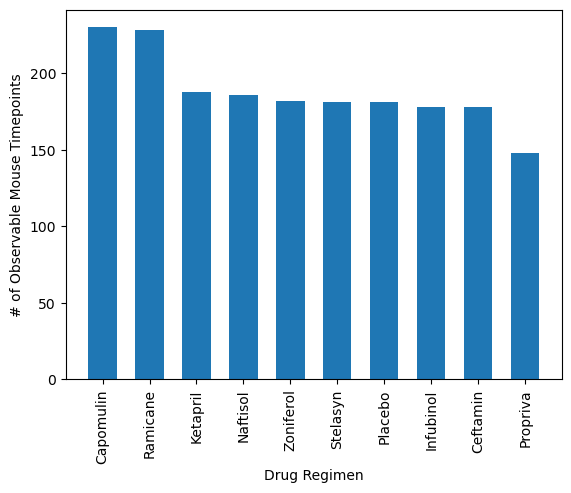

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(timepoints_number))
xlabels = timepoints_number.index
plt.bar(x_axis, timepoints_number, width=0.6)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observable Mouse Timepoints")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, xlabels, rotation=90)
plt.show()

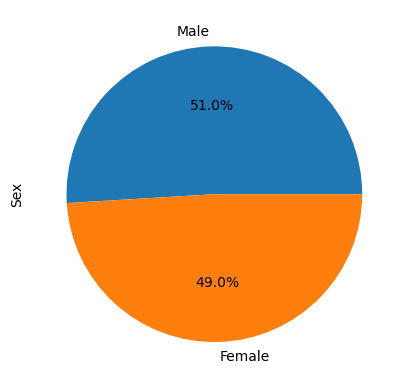

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sexes = mouse_study_cleaned["Sex"].value_counts()
mouse_sexes.plot(kind="pie", autopct="%1.1f%%")
plt.show()

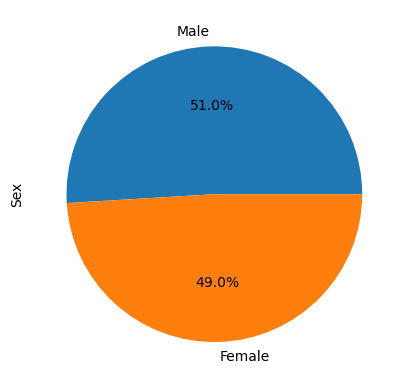

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_sexes.index
male_female = mouse_sexes.values
plt.pie(male_female, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers, and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
                                                 
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = mouse_study_cleaned.groupby(["Mouse ID"])[("Timepoint")].max()

# Merge this group df with the original DataFrame to get the tumor volume as the last timepoint
last_timepoints_df = pd.merge(last_timepoints, mouse_study_cleaned, on=["Mouse ID","Timepoint"], how="left")
last_timepoints_df.reset_index()
last_timepoints_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    drug_df = last_timepoints_df.loc[last_timepoints_df["Drug Regimen"]==drug]

    # add subset 
    final_tumor_volume.append(drug_df['Tumor Volume (mm3)'])

    # Determine outliers using upper and lower bounds
    quartiles = drug_df['Tumor Volume (mm3)'].quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    lower_outlier_series = drug_df["Tumor Volume (mm3)"] < lower_bound
    upper_outlier_series = drug_df["Tumor Volume (mm3)"] > upper_bound
    outlier_series = drug_df.loc[lower_outlier_series | upper_outlier_series, "Tumor Volume (mm3)"]
    print(f"{drug}'s potential outliers: {outlier_series}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


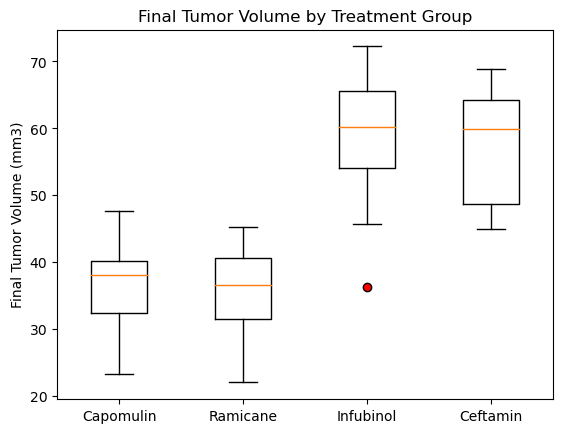

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(final_tumor_volume, flierprops={"markerfacecolor": "r"}, labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume by Treatment Group")
plt.show()

# Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# create data frame for single mouse treated with Capomulin
single_mouse = mouse_study_cleaned.loc[mouse_study_cleaned["Mouse ID"]=="l509"]

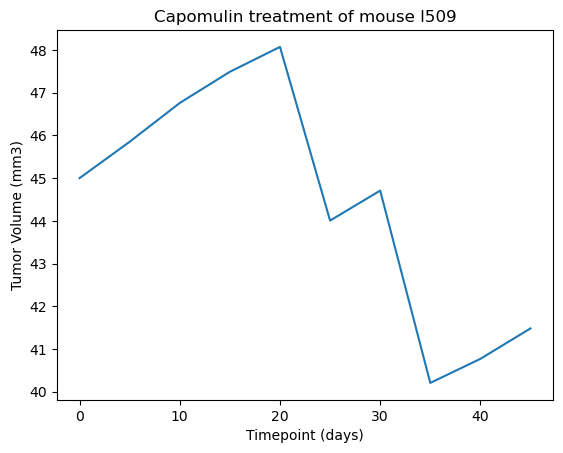

In [29]:
# plot as line graph
single_mouse.plot(x="Timepoint", y="Tumor Volume (mm3)", title="Capomulin treatment of mouse l509",
                  xlabel = "Timepoint (days)", ylabel= "Tumor Volume (mm3)", legend=False)
plt.show()

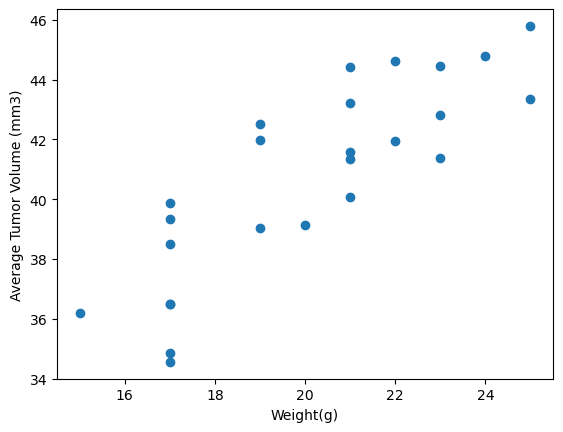

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = mouse_study_cleaned.loc[mouse_study_cleaned["Drug Regimen"]=="Capomulin"]
avg_tumor_capomulin_df = capomulin.groupby(["Mouse ID"]).mean(numeric_only=True)

plt.scatter(avg_tumor_capomulin_df["Weight (g)"], avg_tumor_capomulin_df["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show() 

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


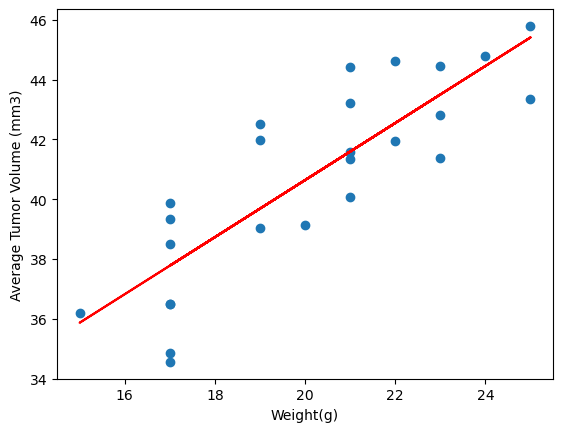

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(m, b, r, _, _) = st.linregress(avg_tumor_capomulin_df["Weight (g)"], avg_tumor_capomulin_df["Tumor Volume (mm3)"])
print(f'The correlation between mouse weight and the average tumor volume is {r:.2f}')

y_calc = m * avg_tumor_capomulin_df["Weight (g)"].values + b

plt.scatter(avg_tumor_capomulin_df["Weight (g)"], avg_tumor_capomulin_df["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.plot(avg_tumor_capomulin_df["Weight (g)"], y_calc, "r")
plt.show()